In [40]:
import pandas as pd
import numpy as np


## Data Acquisition: 

* Find data to support business needs or support claims
* Come up with questions/hypothesis to solve business problem

## Data Preprocessing: 

* Clean up data and extract only important information
* Converting data to appropriate measures

## Data Analysis:

* Look for trends, visualizations, patterns using tools and appropriate columns to support your needs
* Ask the right questions, find data to support questions asked

In [68]:
hospital_df = pd.read_csv("hospital_charges_numeric.csv")

In [87]:
hospital_df.dtypes

Unnamed: 0                                int64
DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
 Total Discharges                         int64
 Average Covered Charges                float64
 Average Total Payments                 float64
Average Medicare Payments               float64
dtype: object

In [70]:
# checking if a specific hospital is in the dataset
hospital_df[hospital_df["Provider Name"] == "PIH HOSPITAL - DOWNEY"]

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments


In [71]:
hospital_df.columns

Index(['Unnamed: 0', 'DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [45]:
# dropping data i may not need
#hospital_df.drop(["Hospital Referral Region Description"], axis=1, inplace=True)

In [72]:
hospital_df.head()

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [73]:
hospital_df.columns

Index(['Unnamed: 0', 'DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [48]:
# begin data cleaning on columns
#hospital_df[" Average Covered Charges "] = hospital_df[" Average Covered Charges "].str.replace('$', '')

In [74]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 13 columns):
Unnamed: 0                              163065 non-null int64
DRG Definition                          163065 non-null object
Provider Id                             163065 non-null int64
Provider Name                           163065 non-null object
Provider Street Address                 163065 non-null object
Provider City                           163065 non-null object
Provider State                          163065 non-null object
Provider Zip Code                       163065 non-null int64
Hospital Referral Region Description    163065 non-null object
 Total Discharges                       163065 non-null int64
 Average Covered Charges                163065 non-null float64
 Average Total Payments                 163065 non-null float64
Average Medicare Payments               163065 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 16.2+ MB


In [75]:
#hospital_df[" Average Covered Charges "] = hospital_df[" Average Covered Charges "].astype(float)

In [76]:
#hospital_df[" Average Covered Charges "].count()

In [77]:
#id_count = hospital_df["Provider Id"].nunique()
#id_count

In [78]:
bed_df = pd.read_csv("Hospitals (1).csv")
bed_df.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'NAME', 'ADDRESS', 'ADDRESS2', 'CITY',
       'STATE', 'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION',
       'COUNTY', 'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE',
       'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD',
       'VAL_DATE', 'WEBSITE', 'STATE_ID', 'ALT_NAME', 'ST_FIPS', 'OWNER',
       'TTL_STAFF', 'BEDS', 'TRAUMA', 'HELIPAD', 'DATECREATE'],
      dtype='object')

In [79]:
cols_to_keep = ['BEDS', "NAME", "ID", "CITY", "ADDRESS", "POPULATION"]
new_bed_df = bed_df[cols_to_keep]

In [80]:
new_bed_df.head()

,BEDS,NAME,ID,CITY,ADDRESS,POPULATION
0,279,CHILDREN'S HOSPITAL OF ORANGE COUNTY,70892868,ORANGE,1201 WEST LA VETA AVENUE,279
1,102,MONTCLAIR HOSPITAL MEDICAL CENTER,72091763,MONTCLAIR,5000 SAN BERNARDINO STREET,102
2,199,PIH HOSPITAL - DOWNEY,72390241,DOWNEY,11500 BROOKSHIRE AVENUE,199
3,125,PROVIDENCE LITTLE COMPANY OF MARY SUBACUTE CAR...,72690732,SAN PEDRO,1322 WEST 6TH STREET,125
4,115,PROVIDENCE LITTLE COMPANY OF MARY TRANSITIONAL...,72790503,TORRANCE,4320 MARICOPA STREET,115


In [81]:
merged_df = pd.merge(hospital_df, new_bed_df, how="left", left_on="Provider Name", right_on="NAME")

In [82]:
merged_df.dropna(inplace=True)

In [83]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126411 entries, 0 to 184215
Data columns (total 19 columns):
Unnamed: 0                              126411 non-null int64
DRG Definition                          126411 non-null object
Provider Id                             126411 non-null int64
Provider Name                           126411 non-null object
Provider Street Address                 126411 non-null object
Provider City                           126411 non-null object
Provider State                          126411 non-null object
Provider Zip Code                       126411 non-null int64
Hospital Referral Region Description    126411 non-null object
 Total Discharges                       126411 non-null int64
 Average Covered Charges                126411 non-null float64
 Average Total Payments                 126411 non-null float64
Average Medicare Payments               126411 non-null float64
BEDS                                    126411 non-null float64
NAME   

In [88]:
LH_merged_df = merged_df

In [60]:
top5_df = pd.read_csv("top5DRG.csv")
top5_df.head()

,Unnamed: 0,DRG Definition,count,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,0,194 - SIMPLE PNEUMONIA & PLEURISY W CC,3023,50242,DOMINICAN HOSPITAL,1555 SOQUEL DRIVE,SANTA CRUZ,CA,95065,CA - Santa Cruz,96,$60386.84,$9175.01,$8250.46
1,1,194 - SIMPLE PNEUMONIA & PLEURISY W CC,3023,70027,MANCHESTER MEMORIAL HOSPITAL,71 HAYNES ST,MANCHESTER,CT,6040,CT - Hartford,69,$16737.85,$6583.78,$5606.82
2,2,194 - SIMPLE PNEUMONIA & PLEURISY W CC,3023,100061,MERCY HOSPITAL INC,3663 S MIAMI AVE,MIAMI,FL,33133,FL - Miami,32,$33432.12,$7389.15,$6414.65
3,3,194 - SIMPLE PNEUMONIA & PLEURISY W CC,3023,100062,MUNROE REGIONAL MEDICAL CENTER,1500 SW 1ST AVE,OCALA,FL,34474,FL - Ocala,96,$25886.77,$5419.63,$4542.18
4,4,194 - SIMPLE PNEUMONIA & PLEURISY W CC,3023,100181,LARKIN COMMUNITY HOSPITAL,7031 SW 62ND AVE,SOUTH MIAMI,FL,33143,FL - Miami,74,$39932.79,$8326.00,$7615.60


In [61]:
merged_df2 = pd.merge(merged_df, top5_df, how="left", on="Provider Name")

In [62]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077318 entries, 0 to 1077317
Data columns (total 30 columns):
DRG Definition_x                        1077318 non-null object
Provider Id_x                           1077318 non-null int64
Provider Name                           1077318 non-null object
Provider Street Address_x               1077318 non-null object
Provider City_x                         1077318 non-null object
Provider State_x                        1077318 non-null object
Provider Zip Code_x                     1077318 non-null int64
 Total Discharges _x                    1077318 non-null int64
 Average Covered Charges _x             1077318 non-null float64
 Average Total Payments _x              1077318 non-null object
Average Medicare Payments_x             1077318 non-null object
BEDS                                    1077318 non-null float64
NAME                                    1077318 non-null object
ID                                      1077318 non-null

In [63]:
# merge bed_df and top5_df (add bed count to top5_df)

In [64]:
#Rename columns to match with the hospital column on which to merge DFs
bed_clean_df = bed_df.rename(columns = {'Hospital Name': 'NAME',
                               'Address':'ADDRESS',
                               'City':'CITY',
                               'State':'STATE',
                               'ZIP Code':'ZIP',
                               'County Name':'COUNTY',
                               'Measure Name':'MEASURE',
                               'Compared to National':'COMPARED TO NATIONAL',
                               'Score':'SCORE'})

In [65]:
# Data Analysis
import matplotlib.pyplot as plt

# groupby - aggregating data with functions (mean, count, sum)
# filter data to show specific pieces of info (colors, size, shape)


In [66]:
# find supporting evidence for claims or discovery of information from data
# barplot shows frequency or counts of events
# scatterplot useful for visualizing patterns and relationships using colors, size, shape
# pie/donut not useful for more than 3-4 slices

In [91]:
LH_merged_df.to_csv("LH_merged_withbedcount.csv")

In [92]:
LH_merged_df

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,BEDS,NAME,ID,CITY,ADDRESS,POPULATION
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,420.0,SOUTHEAST ALABAMA MEDICAL CENTER,11036301.0,DOTHAN,1108 ROSS CLARK CIRCLE,420.0
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,150.0,MARSHALL MEDICAL CENTER SOUTH,9135957.0,BOAZ,"2505 U.S. HIGHWAY 431, SOUTH",150.0
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,328.0,ELIZA COFFEE MEMORIAL HOSPITAL,4435631.0,FLORENCE,205 MARENGO STREET,328.0
4,4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,252.0,SHELBY BAPTIST MEDICAL CENTER,10735007.0,ALABASTER,"1000 FIRST STREET, NORTH",252.0
5,5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79,6653.80,5374.14,226.0,BAPTIST MEDICAL CENTER SOUTH,2132258.0,JACKSONVILLE,14550 OLD SAINT AUGUSTINE RD,226.0
6,5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79,6653.80,5374.14,347.0,BAPTIST MEDICAL CENTER SOUTH,1736111.0,MONTGOMERY,2105 EAST SOUTH BOULEVARD,347.0
8,7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,35841.09,8031.12,5858.50,1157.0,UNIVERSITY OF ALABAMA HOSPITAL,11935233.0,BIRMINGHAM,619 SOUTH 19TH STREET,1157.0
10,9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,75233.38,5541.05,4386.94,279.0,GADSDEN REGIONAL MEDICAL CENTER,4935903.0,GADSDEN,1007 GOODYEAR AVENUE,279.0
11,10,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10046,RIVERVIEW REGIONAL MEDICAL CENTER,600 SOUTH THIRD STREET,GADSDEN,AL,35901,AL - Birmingham,14,67327.92,5461.57,4493.57,35.0,RIVERVIEW REGIONAL MEDICAL CENTER,11237030.0,CARTHAGE,158 HOSPITAL DRIVE,35.0
12,10,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10046,RIVERVIEW REGIONAL MEDICAL CENTER,600 SOUTH THIRD STREET,GADSDEN,AL,35901,AL - Birmingham,14,67327.92,5461.57,4493.57,281.0,RIVERVIEW REGIONAL MEDICAL CENTER,10335999.0,GADSDEN,600 SOUTH THIRD STREET,281.0


In [ ]:
# bed size binning: <50, 50-250, 250-500, >500

In [110]:
bins = [0, 50, 250, 500, 700]
group_names = ['<50', '50-250', '250-500', '>500']

In [111]:
LH_merged_df["bed size count"] = pd.cut(LH_merged_df["BEDS"], bins, labels=group_names)

In [112]:
LH_merged_df

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,BEDS,NAME,ID,CITY,ADDRESS,POPULATION,bed size count
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,420.0,SOUTHEAST ALABAMA MEDICAL CENTER,11036301.0,DOTHAN,1108 ROSS CLARK CIRCLE,420.0,250-500
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,150.0,MARSHALL MEDICAL CENTER SOUTH,9135957.0,BOAZ,"2505 U.S. HIGHWAY 431, SOUTH",150.0,50-250
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,328.0,ELIZA COFFEE MEMORIAL HOSPITAL,4435631.0,FLORENCE,205 MARENGO STREET,328.0,250-500
4,4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,252.0,SHELBY BAPTIST MEDICAL CENTER,10735007.0,ALABASTER,"1000 FIRST STREET, NORTH",252.0,250-500
5,5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79,6653.80,5374.14,226.0,BAPTIST MEDICAL CENTER SOUTH,2132258.0,JACKSONVILLE,14550 OLD SAINT AUGUSTINE RD,226.0,50-250
6,5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,16920.79,6653.80,5374.14,347.0,BAPTIST MEDICAL CENTER SOUTH,1736111.0,MONTGOMERY,2105 EAST SOUTH BOULEVARD,347.0,250-500
8,7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,32,35841.09,8031.12,5858.50,1157.0,UNIVERSITY OF ALABAMA HOSPITAL,11935233.0,BIRMINGHAM,619 SOUTH 19TH STREET,1157.0,NaN
10,9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10040,GADSDEN REGIONAL MEDICAL CENTER,1007 GOODYEAR AVENUE,GADSDEN,AL,35903,AL - Birmingham,34,75233.38,5541.05,4386.94,279.0,GADSDEN REGIONAL MEDICAL CENTER,4935903.0,GADSDEN,1007 GOODYEAR AVENUE,279.0,250-500
11,10,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10046,RIVERVIEW REGIONAL MEDICAL CENTER,600 SOUTH THIRD STREET,GADSDEN,AL,35901,AL - Birmingham,14,67327.92,5461.57,4493.57,35.0,RIVERVIEW REGIONAL MEDICAL CENTER,11237030.0,CARTHAGE,158 HOSPITAL DRIVE,35.0,<50
12,10,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10046,RIVERVIEW REGIONAL MEDICAL CENTER,600 SOUTH THIRD STREET,GADSDEN,AL,35901,AL - Birmingham,14,67327.92,5461.57,4493.57,281.0,RIVERVIEW REGIONAL MEDICAL CENTER,10335999.0,GADSDEN,600 SOUTH THIRD STREET,281.0,250-500


In [113]:
# Creating a group based off of the bins
with_bed_count_df = LH_merged_df.groupby("bed size count").count()
with_bed_count_df["BEDS"]

bed size count
<50         9151
50-250     55374
250-500    43766
>500       10416
Name: BEDS, dtype: int64

In [116]:
beds = LH_merged_df["BEDS"]
avg_fare = LH_merged_df[" Average Covered Charges "]

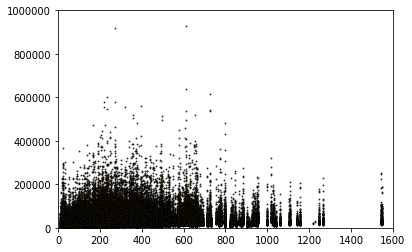

In [131]:
plt.scatter(beds, avg_fare, 
            s=0.75, c="gold", 
            edgecolor="black", linewidth=1, 
            marker="o", alpha=0.8)
plt.xlim(0,1600)
plt.ylim(0,1000000)
plt.show()

In [128]:
LH_merged_df.sort_values(by=['BEDS'])

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,BEDS,NAME,ID,CITY,ADDRESS,POPULATION,bed size count
85868,75944,309 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDER...,150125,COMMUNITY HOSPITAL,901 MACARTHUR BLVD,MUNSTER,IN,46321,IN - Munster,111,15406.92,5089.28,4178.03,-999.0,COMMUNITY HOSPITAL,153881501.0,GRAND JUNCTION,2021 N 12TH ST,-999.0,NaN
173015,153085,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,140166,ST MARYS HOSPITAL,1800 E LAKE SHORE DR,DECATUR,IL,62521,IL - Springfield,70,32269.28,11779.50,10914.20,-999.0,ST MARYS HOSPITAL,8162521.0,DECATUR,1800 E LAKE SHORE DR,-999.0,NaN
4590,4051,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,40010,MERCY MEDICAL CENTER,2710 RIFE MEDICAL LANE,ROGERS,AR,72758,AR - Springdale,40,14819.67,6080.80,5153.30,-999.0,MERCY MEDICAL CENTER,94.0,SPRINGFIELD,FOUNTAIN BLVD,-999.0,NaN
83778,74070,308 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDER...,220066,MERCY MEDICAL CENTER,271 CAREW STREET,SPRINGFIELD,MA,1104,MA - Springfield,23,18925.60,8703.60,7917.52,-999.0,MERCY MEDICAL CENTER,94.0,SPRINGFIELD,FOUNTAIN BLVD,-999.0,NaN
130178,115131,480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,140185,MEMORIAL HOSPITAL,4500 MEMORIAL DRIVE,BELLEVILLE,IL,62226,MO - St. Louis,16,49508.93,15949.00,15037.25,-999.0,MEMORIAL HOSPITAL,98662233.0,CHESTER,1900 STATE STREET,-999.0,NaN
4609,4069,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,40072,BAPTIST HEALTH MEDICAL CENTER-STUTTGART,1703 NORTH BUERKLE ROAD,STUTTGART,AR,72160,AR - Little Rock,12,12887.75,7164.91,6509.91,-999.0,BAPTIST HEALTH MEDICAL CENTER-STUTTGART,62472160.0,STUTTGART,1703 NORTH BUERKLE ROAD,-999.0,NaN
18526,16322,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,450508,MEMORIAL HOSPITAL,1204 MOUND ST,NACOGDOCHES,TX,75961,TX - Houston,11,17635.81,7586.36,6774.72,-999.0,MEMORIAL HOSPITAL,98662233.0,CHESTER,1900 STATE STREET,-999.0,NaN
4617,4077,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,40118,NEA BAPTIST MEMORIAL HOSPITAL,3024 STADIUM BOULEVARD,JONESBORO,AR,72401,AR - Jonesboro,31,17745.12,6740.67,5784.67,-999.0,NEA BAPTIST MEMORIAL HOSPITAL,61472401.0,JONESBORO,3024 STADIUM BOULEVARD,-999.0,NaN
39929,35298,195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC,140166,ST MARYS HOSPITAL,1800 E LAKE SHORE DR,DECATUR,IL,62521,IL - Springfield,30,12204.06,4770.23,3437.06,-999.0,ST MARYS HOSPITAL,8162521.0,DECATUR,1800 E LAKE SHORE DR,-999.0,NaN
83944,74226,308 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDER...,260085,ST JOSEPH MEDICAL CENTER,1000 CARONDELET DR,KANSAS CITY,MO,64114,MO - Kansas City,41,27789.43,6905.14,6272.48,-999.0,ST JOSEPH MEDICAL CENTER,7961701.0,BLOOMINGTON,2200 E WASHINGTON,-999.0,NaN


In [137]:
LH_merged_df['Normalized Charge'] = LH_merged_df[' Average Covered Charges ']/LH_merged_df['BEDS']
LH_merged_df[['Normalized Charge', 'BEDS', ' Average Covered Charges ']].head()

,Normalized Charge,BEDS,Average Covered Charges
0,78.483500,420.0,32963.07
1,100.879000,150.0,15131.85
2,114.513323,328.0,37560.37
4,125.528849,252.0,31633.27
5,74.870752,226.0,16920.79


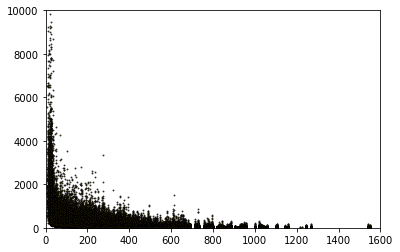

In [143]:

plt.scatter(LH_merged_df['BEDS'], LH_merged_df['Normalized Charge'], 
            s=0.75, c="gold", 
            edgecolor="black", linewidth=1, 
            marker="o", alpha=0.8)
plt.xlim(0,1600)
plt.ylim(0,10000)
plt.show()

In [144]:
top5_1_df = pd.read_csv("top_5_services copy.csv")

In [146]:
top5_1_df.head()

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,25714,194 - SIMPLE PNEUMONIA & PLEURISY W CC,50242,DOMINICAN HOSPITAL,1555 SOQUEL DRIVE,SANTA CRUZ,CA,95065,CA - Santa Cruz,96,60386.84,9175.01,8250.46
1,25800,194 - SIMPLE PNEUMONIA & PLEURISY W CC,70027,MANCHESTER MEMORIAL HOSPITAL,71 HAYNES ST,MANCHESTER,CT,6040,CT - Hartford,69,16737.85,6583.78,5606.82
2,25829,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100061,MERCY HOSPITAL INC,3663 S MIAMI AVE,MIAMI,FL,33133,FL - Miami,32,33432.12,7389.15,6414.65
3,29503,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100062,MUNROE REGIONAL MEDICAL CENTER,1500 SW 1ST AVE,OCALA,FL,34474,FL - Ocala,96,25886.77,5419.63,4542.18
4,29740,194 - SIMPLE PNEUMONIA & PLEURISY W CC,100181,LARKIN COMMUNITY HOSPITAL,7031 SW 62ND AVE,SOUTH MIAMI,FL,33143,FL - Miami,74,39932.79,8326.00,7615.60
